C:\Users\Neev\AppData\Local\Temp\ipykernel_369340\2479465194.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns, rotation=45)
C:\Users\Neev\AppData\Local\Temp\ipykernel_369340\2479465194.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


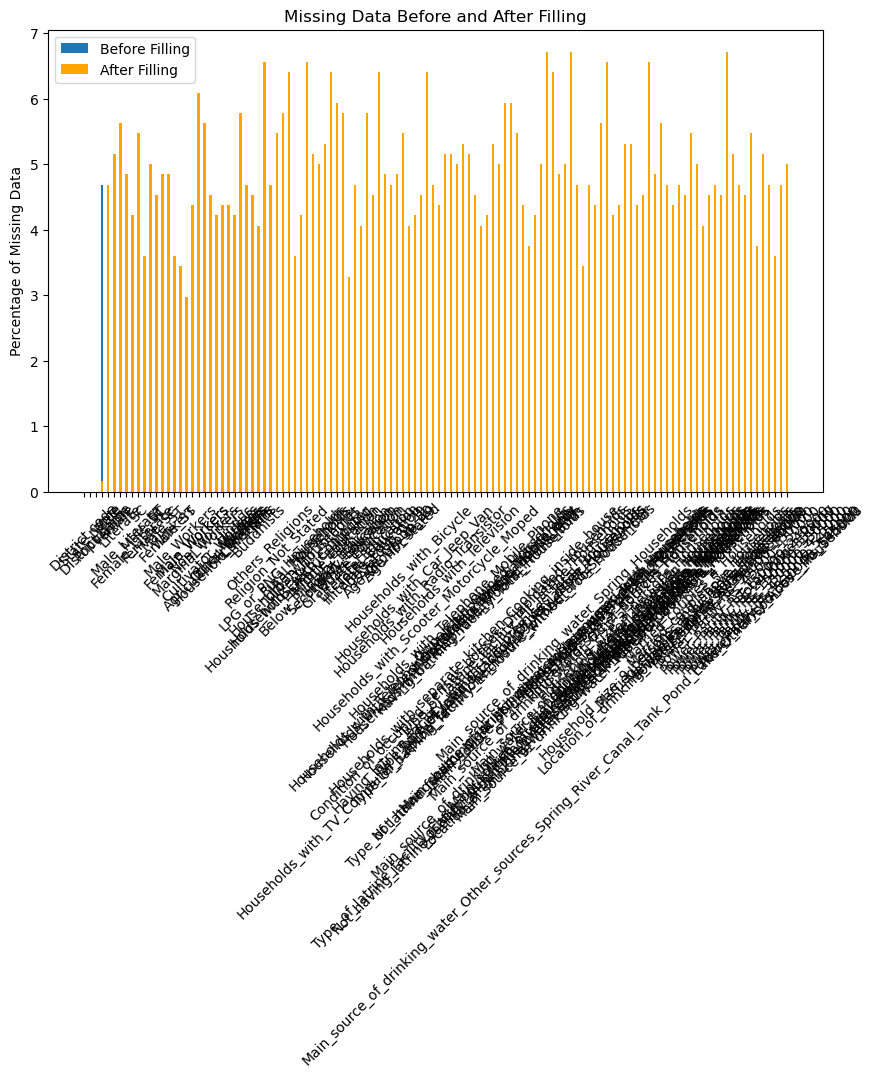

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('census_2011.csv')

missing_percentage_before = (df.isnull().sum() / len(df)) * 100
df['Population'].fillna(df['Male'] + df['Female'], inplace=True)
missing_percentage_after = (df.isnull().sum() / len(df)) * 100
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
before = ax.bar(missing_percentage_before.index, missing_percentage_before, bar_width, label='Before Filling')
after = ax.bar(missing_percentage_after.index, missing_percentage_after, bar_width, label='After Filling', color='orange')

ax.set_ylabel('Percentage of Missing Data')
ax.set_title('Missing Data Before and After Filling')
ax.set_xticklabels(df.columns, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import os
housing_data_path = "housing.csv"
census_data_path = "census_2011.csv"
housing_df = pd.read_csv(housing_data_path)
census_df = pd.read_csv(census_data_path)

merge_on_columns = ['State name', 'District name']
merged_df = pd.merge(census_df, housing_df, left_on=['State name', 'District name'], right_on=['State Name', 'District Name'], how="left")

clean_data_folder = "Clean_Data"
if not os.path.exists(clean_data_folder):
    os.makedirs(clean_data_folder)

output_file_path = os.path.join(clean_data_folder, "census.csv")
merged_df.to_csv(output_file_path, index=False)
print("Processed data saved to 'census.csv' in the 'Clean_Data' folder.")

Processed data saved to 'census.csv' in the 'Clean_Data' folder.


In [5]:
import pandas as pd
housing_data = pd.read_csv(r'housing.csv')
census_data = pd.read_csv(r'census_2011.csv')
census_data.rename(columns={'District name': 'District Name'}, inplace=True)

print("Housing Data Columns:")
print(housing_data.columns)
print("\nCensus Data Columns:")
print(census_data.columns)

merged_data = pd.merge(housing_data, census_data, on='District Name')
print("\nMerged Data:")
print(merged_data.head())

merged_data['Absolute Dilapidated Rural'] = merged_data['Total Number of households'] * (merged_data['Total Number of Dilapidated'] / 100)
merged_data['Absolute Latrine_premise Rural'] = merged_data['Total Number of households'] * (merged_data['Latrine_premise'] / 100)
merged_data['Absolute Dilapidated Urban'] = merged_data['Total Number of households'] * ((100 - merged_data['Total Number of Livable']) / 100)
merged_data['Absolute Latrine_premise Urban'] = merged_data['Total Number of households'] * ((100 - merged_data['Latrine_premise']) / 100)

print(merged_data.head())

Housing Data Columns:
Index(['State Code', 'State Name', 'District Code', 'District Name',
       'Tehsil Code', 'Tehsil Name', 'Town Code/Village code', 'Ward No',
       'Area Name', 'Rural/Urban',
       ...
       'Contition_T_Total', 'Contition_T_Good', 'Contition_T_Livable',
       'Contition_T_Dilapidated', 'Contition_R_Total', 'Residence_Good',
       'Residence_Livable', 'Residence_Dilapidated', 'Residence_cum_other',
       'Residence_cum_Good'],
      dtype='object', length=156)

Census Data Columns:
Index(['District code', 'State name', 'District Name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_5450

C:\Users\Neev\AppData\Local\Temp\ipykernel_369340\1937961620.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_data['Households per 100 people'] = (urban_data['Total Number of households'] / urban_data['Population']) * 100
C:\Users\Neev\AppData\Local\Temp\ipykernel_369340\1937961620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rural_data['Households per 100 people'] = (rural_data['Total Number of households'] / rural_data['Population']) * 100
C:\Users\Neev\AppData\Local\Temp\ipykernel_369340\

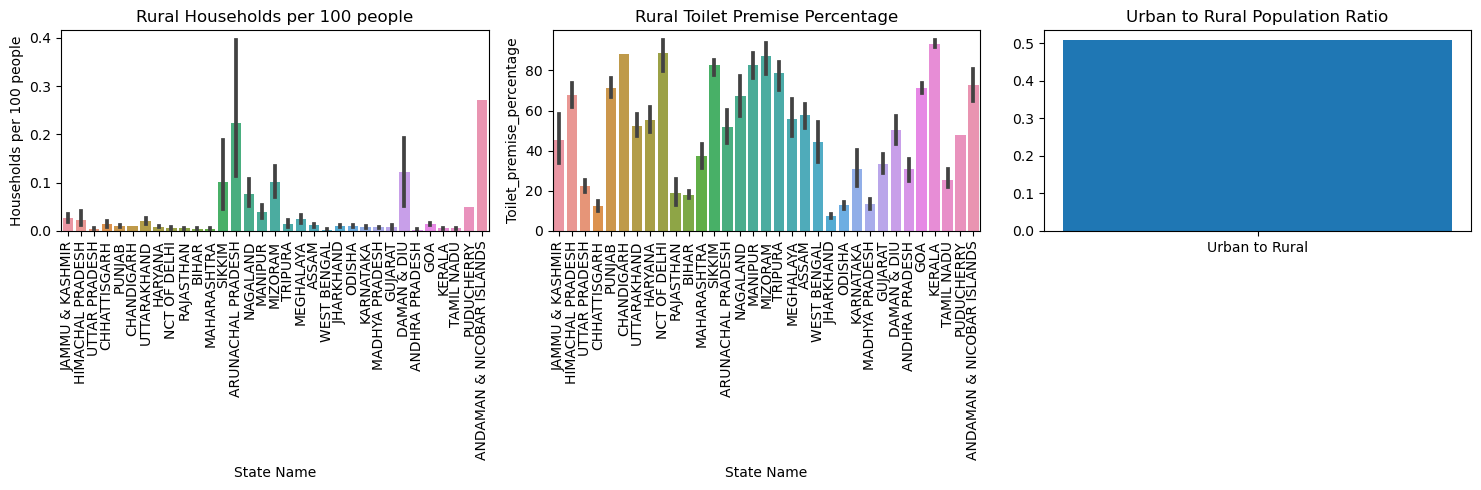

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

urban_data = merged_data[merged_data['Rural/Urban'] == 'Urban']
rural_data = merged_data[merged_data['Rural/Urban'] == 'Rural']
urban_data['Households per 100 people'] = (urban_data['Total Number of households'] / urban_data['Population']) * 100
rural_data['Households per 100 people'] = (rural_data['Total Number of households'] / rural_data['Population']) * 100

urban_data['Toilet_premise_percentage'] = (urban_data['Latrine_premise'] / urban_data['Total Number of households']) * 100
rural_data['Toilet_premise_percentage'] = (rural_data['Latrine_premise'] / rural_data['Total Number of households']) * 100
urban_to_rural_ratio = urban_data['Urban_Households'].sum() / rural_data['Rural_Households'].sum()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='State Name', y='Households per 100 people', data=rural_data)
plt.xticks(rotation=90)
plt.title('Rural Households per 100 people')

plt.subplot(1, 3, 2)
sns.barplot(x='State Name', y='Toilet_premise_percentage', data=rural_data)
plt.xticks(rotation=90)
plt.title('Rural Toilet Premise Percentage')

plt.subplot(1, 3, 3)
plt.bar(['Urban to Rural'], [urban_to_rural_ratio])
plt.title('Urban to Rural Population Ratio')

plt.tight_layout()
plt.show()

In [12]:
import pandas as pd

housing_data = pd.read_csv("housing.csv")
census_data = pd.read_csv("census_2011.csv")
census_data.rename(columns={'District name': 'District Name'}, inplace=True)
merged_data = pd.merge(housing_data, census_data, on="District Name")
print(census_data.columns)

merged_data["Difference"] = ((merged_data["Rural_Households"] - merged_data["Urban_Households"]) / merged_data["Rural_Households"]) * 100
major_difference_districts = merged_data[abs(merged_data["Difference"]) > 10]["District Name"]

print("Districts with major differences (> 10%):")
print(major_difference_districts)

Index(['District code', 'State name', 'District Name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)
Districts with major differences (> 10%):
3              Badgam
4              Badgam
5              Badgam
6         Leh(Ladakh)
7         Leh(Ladakh)
            ...      
1925         Nicobars
1926         Nicobars
1927    South Andaman
1928    South Andaman
1929    South Andaman
Name: District Name, Length: 1652, dtype: object
